In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(['Id','PetalLengthCm','PetalWidthCm','Species'], axis='columns')
df.head()


,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Text(0, 0.5, 'Sepal Width')

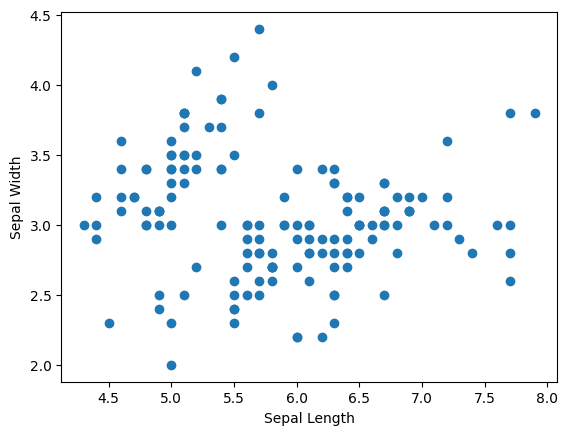

In [4]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
y_predicted

c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [6]:
df['cluster']=y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [7]:
km.cluster_centers_

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

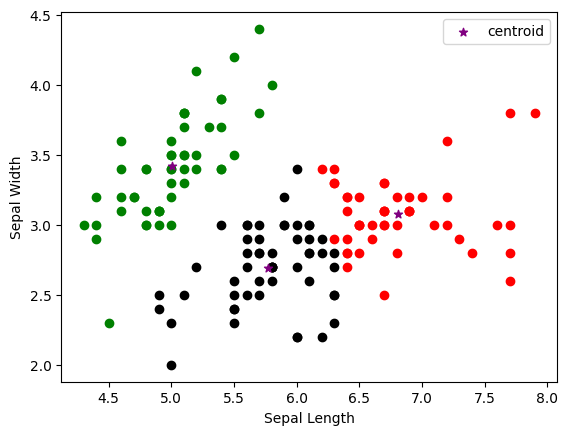

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='green')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='red')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


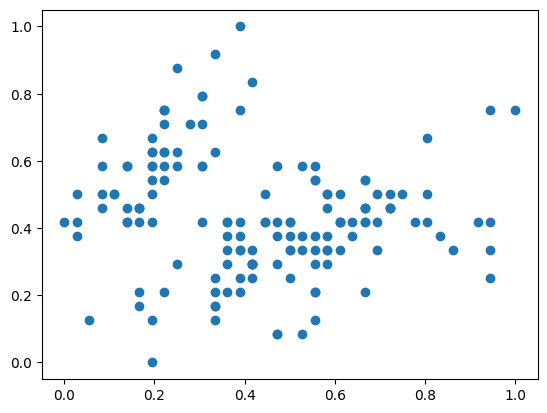

In [11]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
y_predicted

c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [13]:
df['cluster']=y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,cluster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


In [14]:
km.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.40483539, 0.28009259],
       [0.19897959, 0.60034014]])

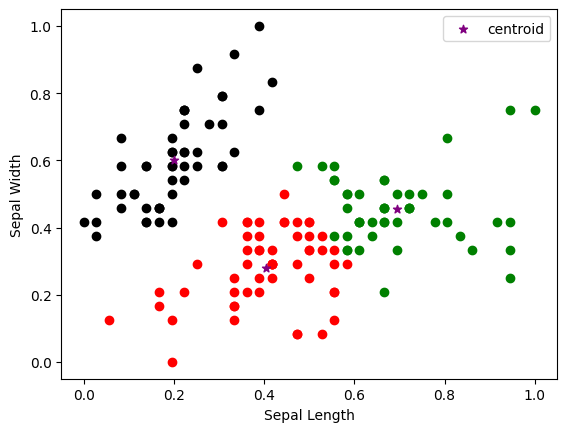

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='green')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='red')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm']])
    sse.append(km.inertia_) #inertia - iteration i.e 1-10

c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

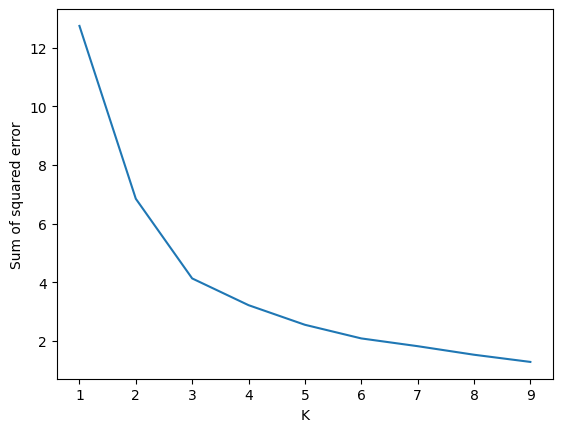

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<h4 style='color:purple'>Exercise</h4>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k